# **Medical Symptoms Classification**

This project focuses on using machine learning techniques in order to classify medical symptoms based on self-reported audio recordings, with the goal of improving conversational agents in the medical field. The dataset comprises thousands of audio snippets, totaling over 8 hours of recording time, these recordings were created through a multi-step process where contributors first provided textual descriptions of symptoms, followed by recording corresponding audio. However, challenges such as incorrect labels and poor audio quality necessitate thorough data cleaning before model training. By addressing these issues, the project aims to create robust models that can accurately classify medical symptoms, thus enhancing the efficacy of conversational agents and improving healthcare diagnosis.

**The research questions are:**

* Can we classify the symptom of the patient to cough or infected wound only by the audio file?
* Which model classify better, audio file classification model or NLP model of the audio files transcriptions?
---

# **Table of Contents**

---

#### 1. [Libraries Imports](#SectionA)

#### 2. [Exploratory Data Analysis](#SectionB)

#### 2.1. [Audio Quality Measures](#SectionC)

#### 2.2. [Personal Audio Measures](#SectionD)

#### 2.3. [Symptom - The Label](#SectionE)

#### 2.4. [Audio Recordings Features](#SectionF)

#### 2.5. [Clustering Methods](#SectionG)

# **Libraries Imports**
<a class="anchor" id="SectionA"></a>

In [129]:
import sys
import os

# Ensure you're adding the correct path to the system path
sys.path.append(os.path.abspath('./src'))

# Import EDA and modeling classes
from Classes import EDAClass, ModelingClass

---
# **Exploratory Data Analysis**
<a class="anchor" id="SectionB"></a>

In [130]:
meta_data_path = "overview-of-recordings.csv"
audio_dir = "/data/"
EDA_analysis = EDAClass(filepath = meta_data_path, audio_dir = audio_dir, binary_outcome=True)

In [131]:
EDA_analysis.get_data().head()

,audio_clipping,audio_clipping:confidence,background_noise_audible,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker,quiet_speaker:confidence,speaker_id,file_download,file_name,phrase,Symptoms,writer_id
0,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,31349958,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_31349958_55816195.wav,My son had his lip pierced and it is swollen a...,Infected wound,43755034
1,no_clipping,1.0000,no_noise,1.0000,4.67,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_82524191.wav,My muscles in my lower back are aching,Infected wound,21665495
2,no_clipping,1.0000,light_noise,0.6525,3.67,audible_speaker,1.0,44023395,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_44023395_102591472.wav,I think my wound is infected,Infected wound,21665495
3,no_clipping,1.0000,no_noise,1.0000,4.00,audible_speaker,1.0,20518958,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_20518958_23074828.wav,I cut my hand a couple of weeks ago and even t...,Infected wound,19638651
4,no_clipping,0.6627,light_noise,0.6627,4.00,audible_speaker,1.0,44027675,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_44027675_27634315.wav,My son nicked his neck with an old razor and t...,Infected wound,43755034


I will dive in the data to understand the structure of it better:

## **Audio Quality Measures**
In this subsection I will delve into the audio quality measures which are:
* $\underline{Audio~Clipping}$: Audio clipping is a distortion in the waveform, it occurs when an amplifier is pushed beyond its maximum limit, causing the signal to get distorted.

* $\underline{Background~Noise~Audible}$: Is the background noise light or not noticable?

* $\underline{Quiet~Speaker}$: Is the speaker talks quietly?

* $\underline{Confidence}$: Each quality measure has confidence score between $0$ and $1$ of the machine in the quality classification, i.e., `Audio Clipping` feature could be set `light_clipping` with confidence of $0.65$.

* $\underline{Overall~Quality~of~the~Audio}$: An overall numeric score between $3$ and $5$ of the quality of the audio (it's not a weighted average of the other quality measures).

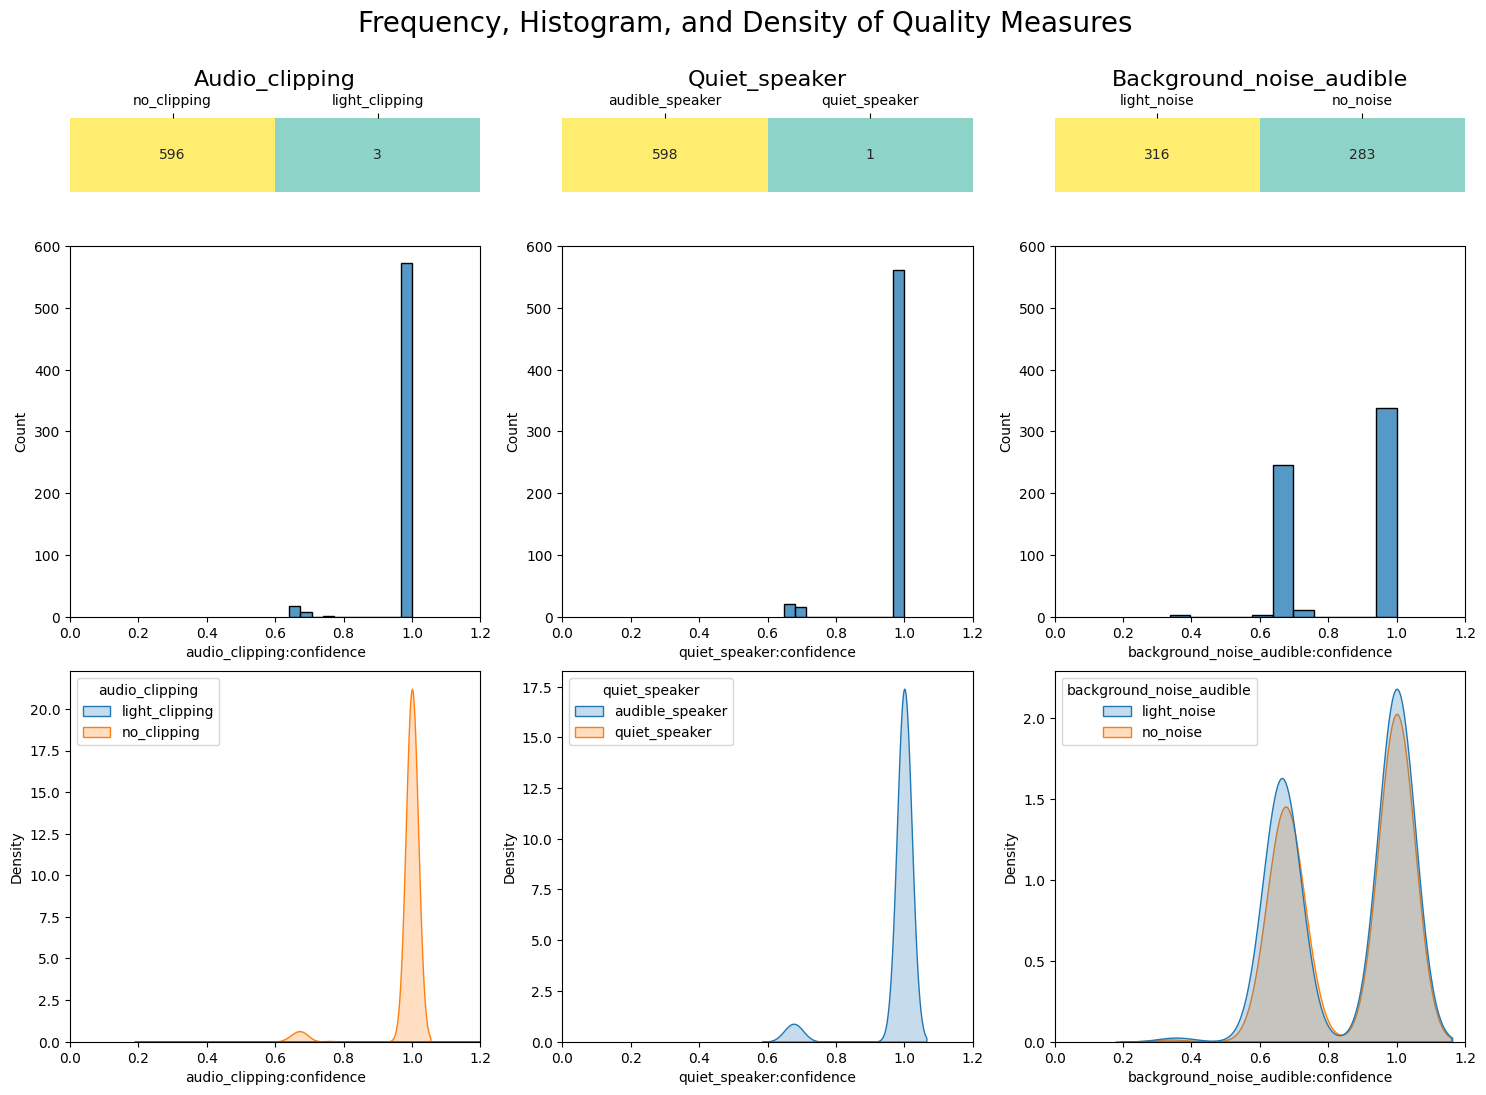

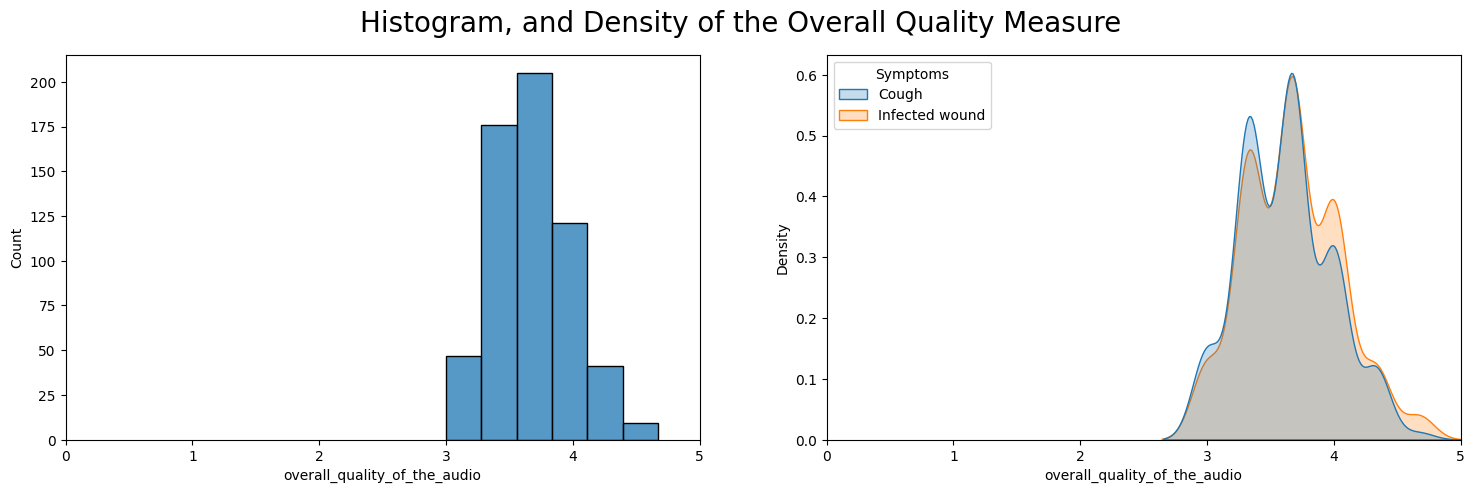

In [132]:
EDA_analysis.EDA_quality_measures()

We can see somewhat of a normality in the distribution of the feature, we will check the correlation of all the quality measures

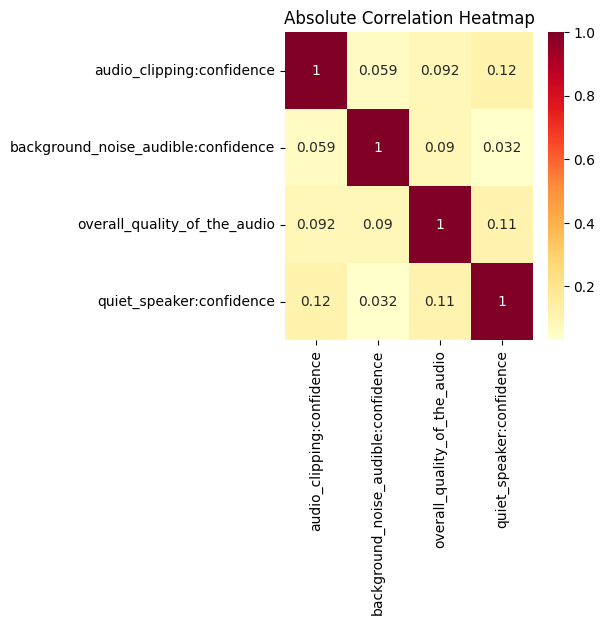

In [133]:
EDA_analysis.Correlation_Matrix()

---
## **Personal Audio Measures**
In this subsection I will delve into the personal audio measures which are:

* $\underline{Writer~ID}$: The person's unique ID which wrote the pharse said by the speaker.

* $\underline{Speaker~ID}$: The person's unique ID which was recored in the audio file.


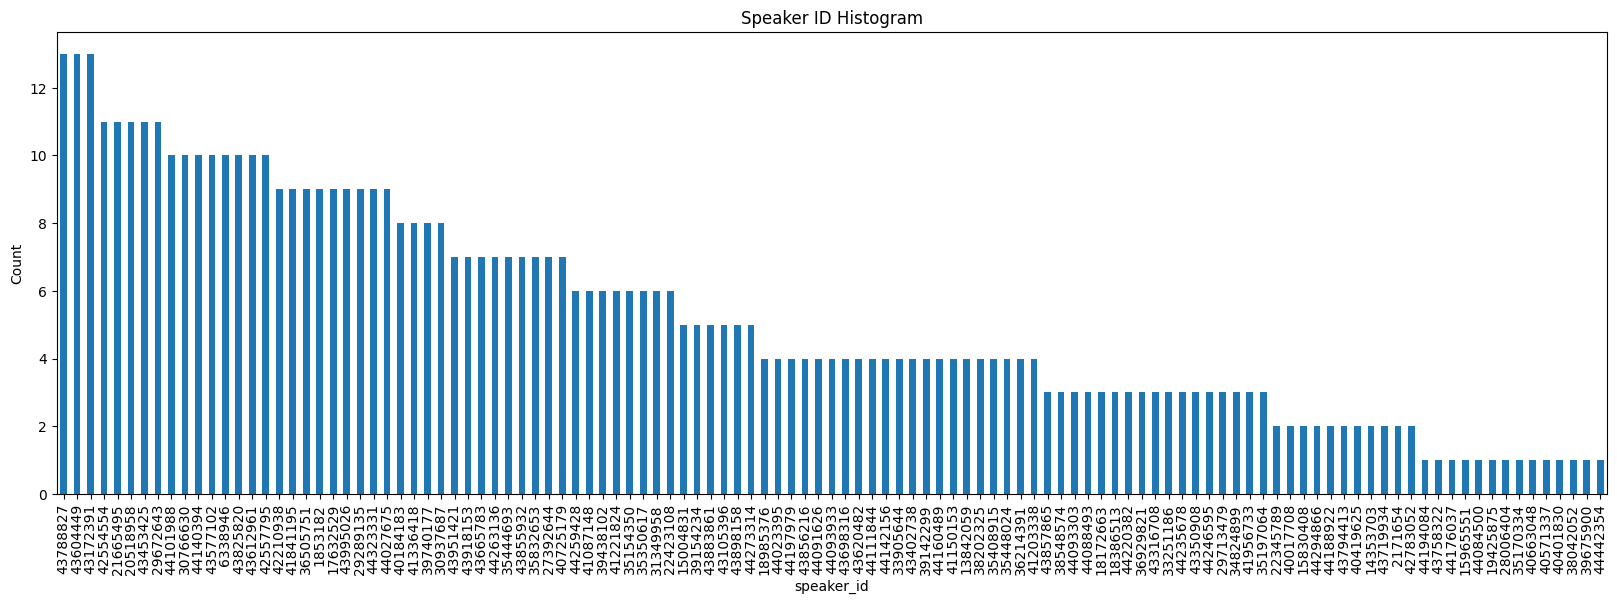

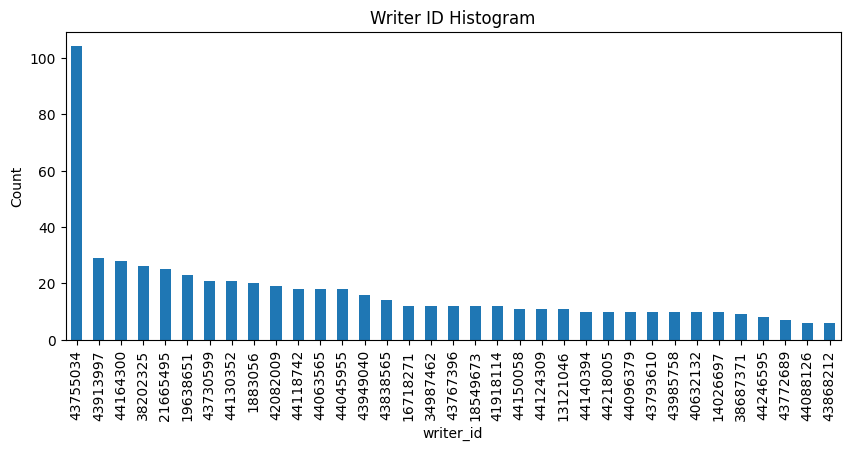

In [134]:
EDA_analysis.EDA_writers_speakers()

---
## **Symptom**
The label

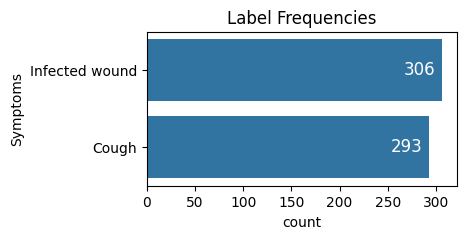

In [135]:
EDA_analysis.EDA_symptoms()

---
## **Audio Recordings**

In [136]:
EDA_analysis.Add_audio_features(inplace = True)

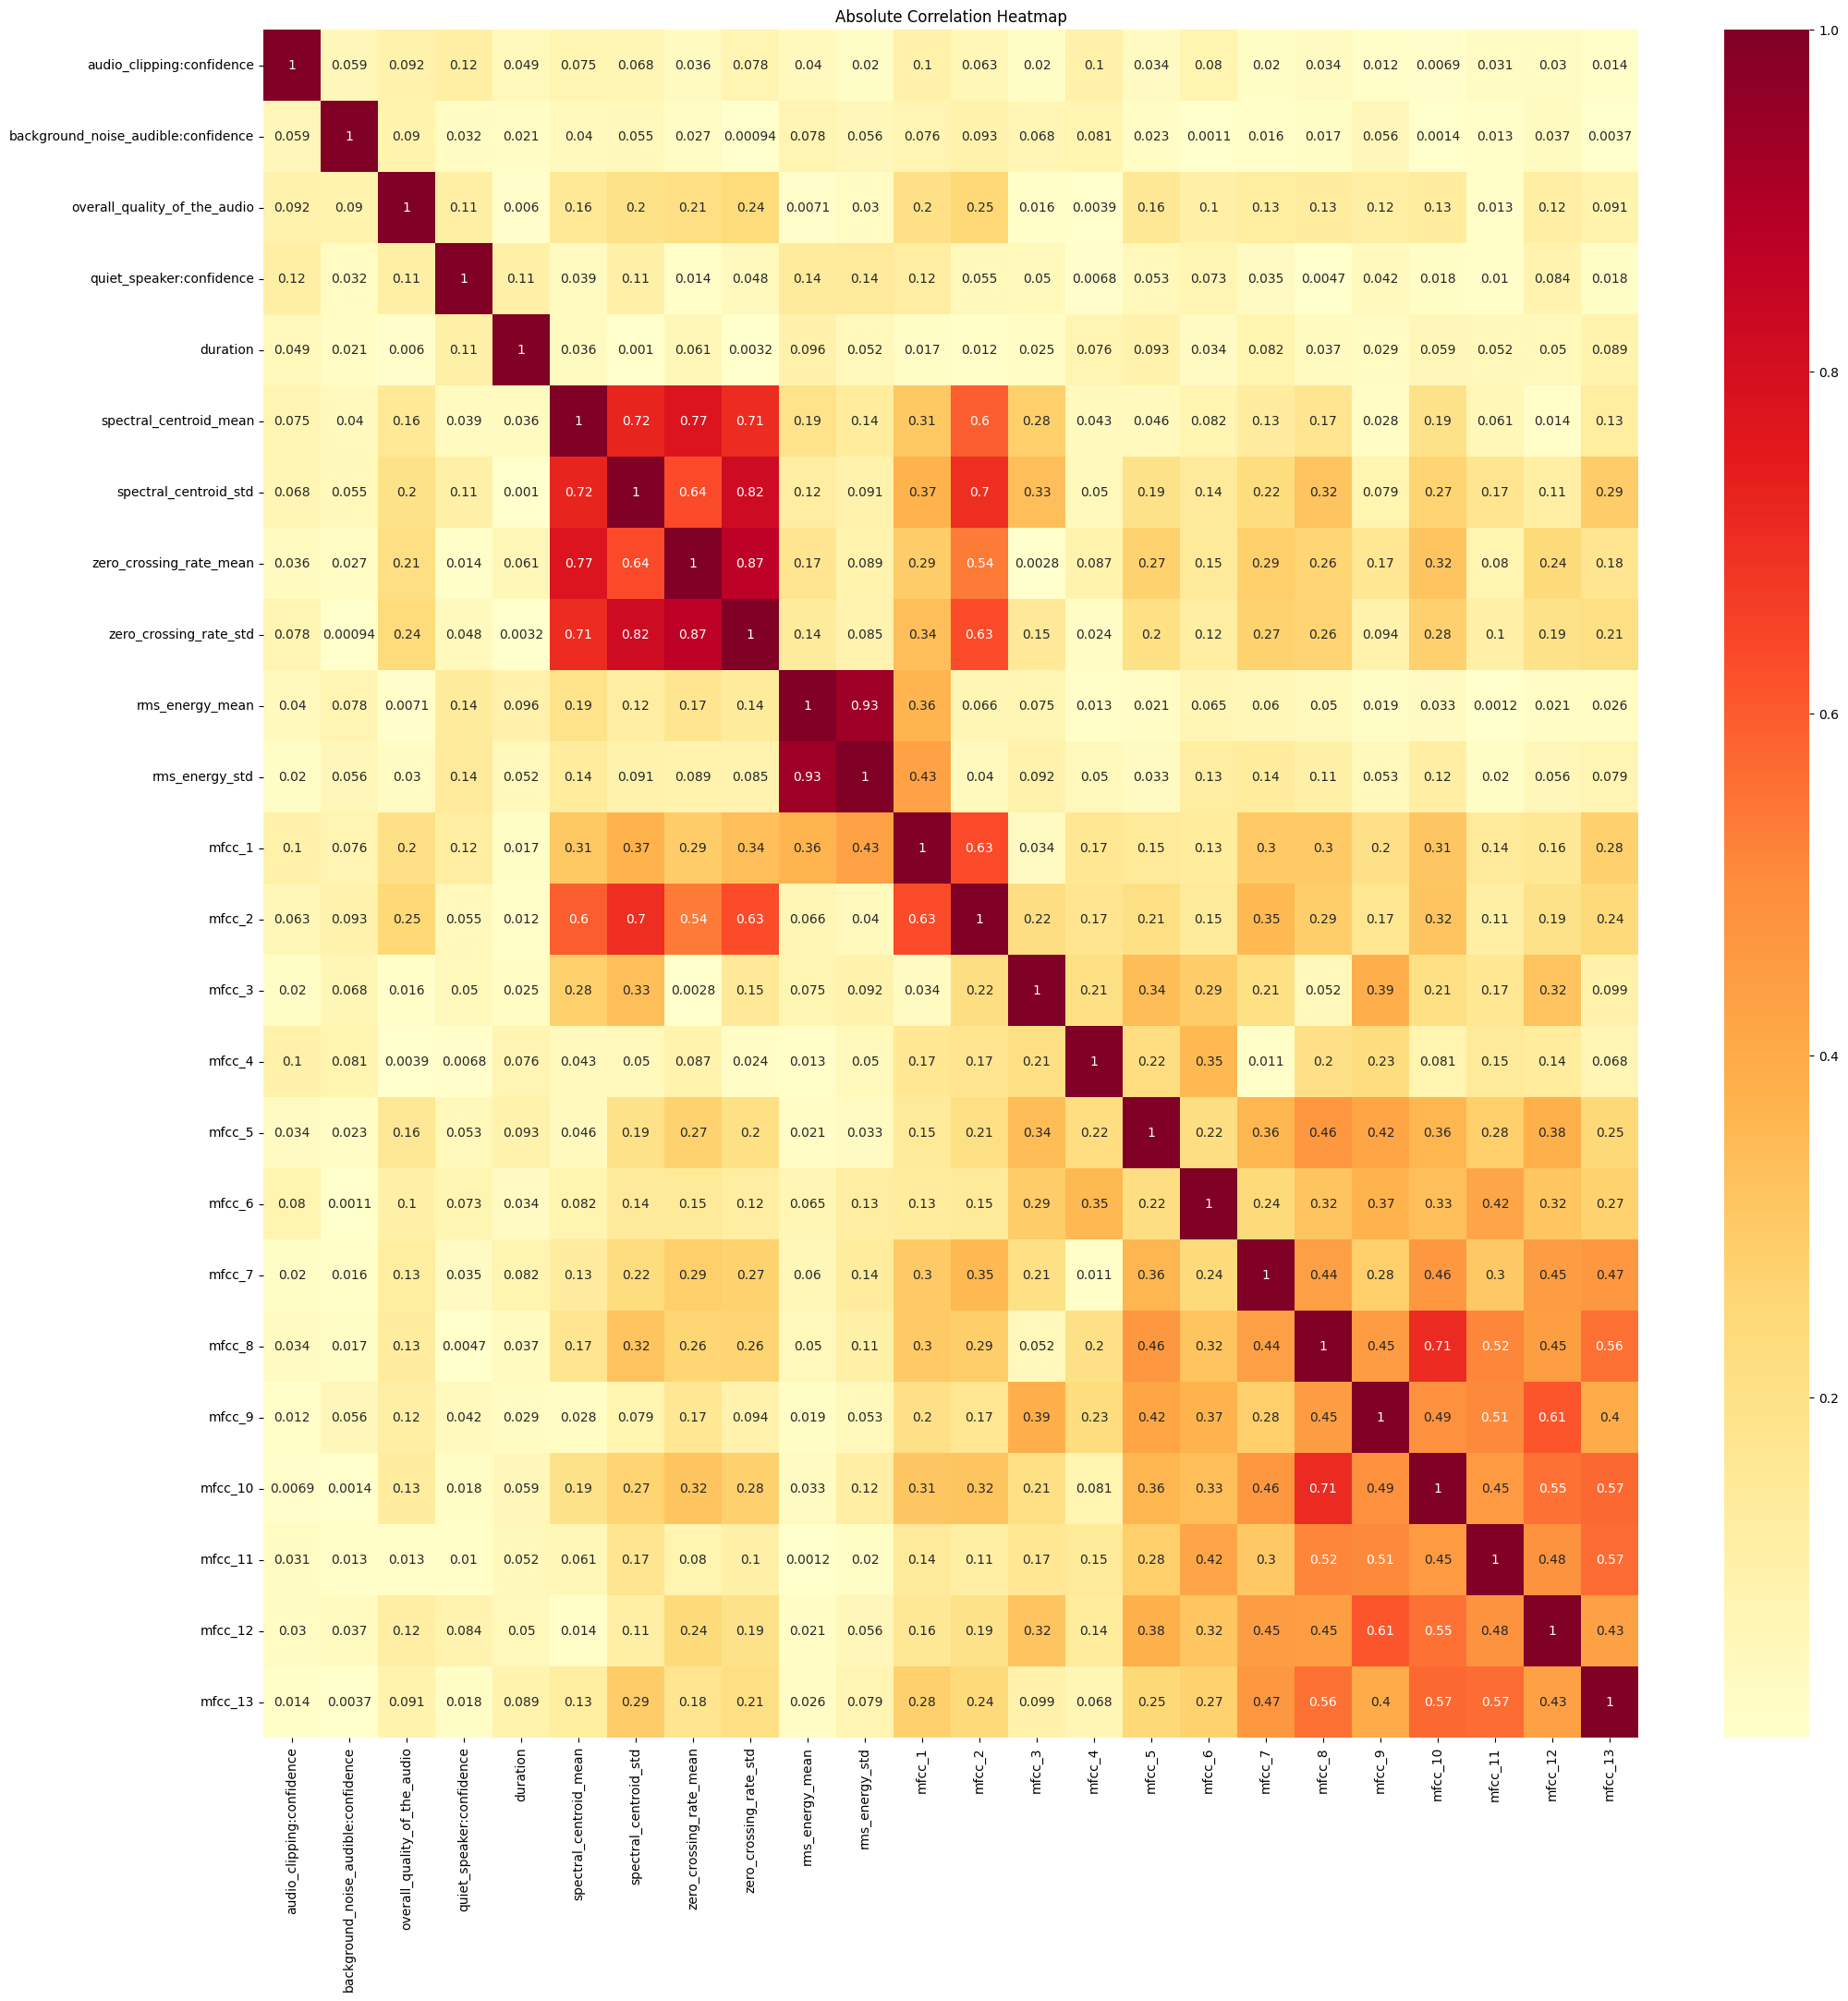

In [137]:
EDA_analysis.Correlation_Matrix()

## **Clustering**

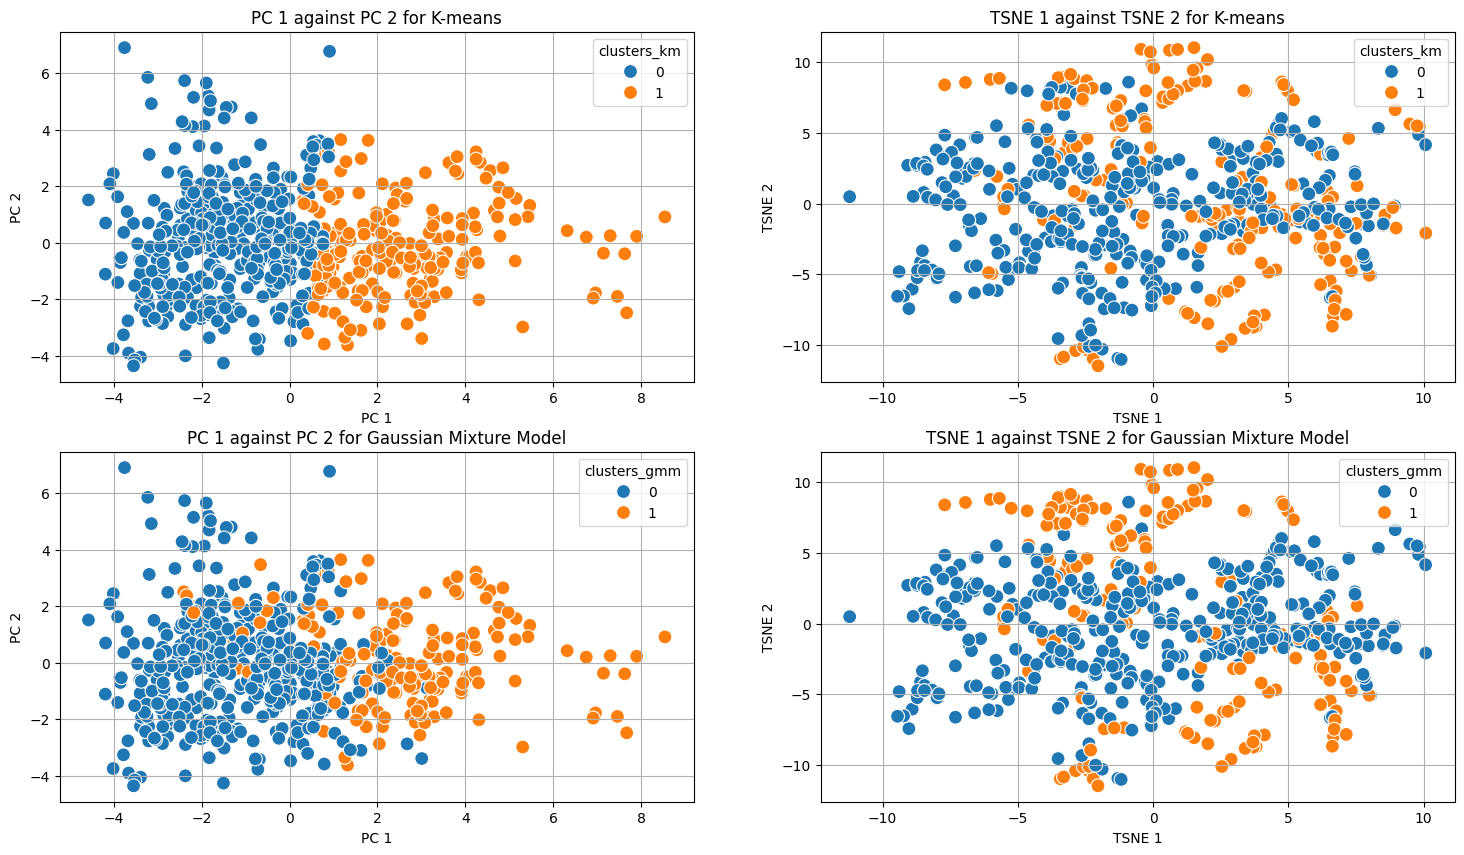

In [138]:
X_a, y_a = EDA_analysis.X, EDA_analysis.y
EDA_analysis.Clustering(inplace = True)
X_b, y_b = EDA_analysis.X, EDA_analysis.y

# **Modeling Section**
In this section I've created a modeling object which all the neccesary variables and methods in order to preform the modeling procedures.

The following models were selected with gridsearch cross-validation with the following parameter grids are:
* <u>**Logistic Regression**</u>

  `Penalty`: LASSO (L1) or Ridge (L2).

  `C`: $∈[e^−1, 1]$ - penalty inverse parameter, as it is smaller the stronger the regularization.

* <u>**K-Nearest Neighbors**</u>

  `K`: number of nearest neighbors $∈ [3, m]$ in odds numbers. Where, $m$ is the number of observations in the test set.

* <u>**Support Vector Machine**</u>

  `kernel`: Linear, Polynomial, or Radial.
  
  `C`: $∈[e^−1, 1]$ - penalty inverse parameter, as it is smaller the stronger the regularization.

  `degree`: $∈[3, 6]$ for the polynomial kernel.

  `gamma`: $∈\{0.001, 0.01, 0.1, 1\}$ for the radial kernel.

* <u>**Classification Tree**</u>

  `Maximal Depth`: $∈[3, 7]$ - the maximal depth of the tree.
  `Minimum Samples in Leaf`: $∈[5, 8]$ - the minimum observations in a leaf node.

  `Criterion`: Gini or Entropy.

## **Full Data without clustering**

In [163]:
models_analysis_a = modelingClass(X_a,y_a)
models_analysis_a.split_scale_data()
models_analysis_a.train_models()
models_analysis_a.test_models()

Splitting and scaling the data
-----------------------------------
Training Phase:
Training 'Logistic Regression' model
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Training 'K-Nearest Neighbors' model
Fitting 5 folds for each of 89 candidates, totalling 445 fits
Training 'Support Vector Machine' model
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Training 'Decision Tree' model
Fitting 5 folds for each of 24 candidates, totalling 120 fits
The training of the models is done.
-----------------------------------
Testing Phase:
Testing 'Logistic Regression' model
Testing 'K-Nearest Neighbors' model
Testing 'Support Vector Machine' model
Testing 'Decision Tree' model
The testing of the models is done.
-----------------------------------


,Model,Best Parameters,Train Accuracy,Test Accuracy,Test Sensitivity,Test Specificity,Test F1 Score
0,Logistic Regression,"{'C': 0.5769498103804869, 'penalty': 'l2'}",0.702,0.711,0.745,0.674,0.729
1,K-Nearest Neighbors,{'n_neighbors': 59},0.661,0.633,0.681,0.581,0.660
2,Support Vector Machine,"{'C': 0.9048374180359594, 'degree': 3, 'gamma'...",0.737,0.711,0.840,0.570,0.752
3,Decision Tree,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.728,0.706,0.798,0.605,0.739


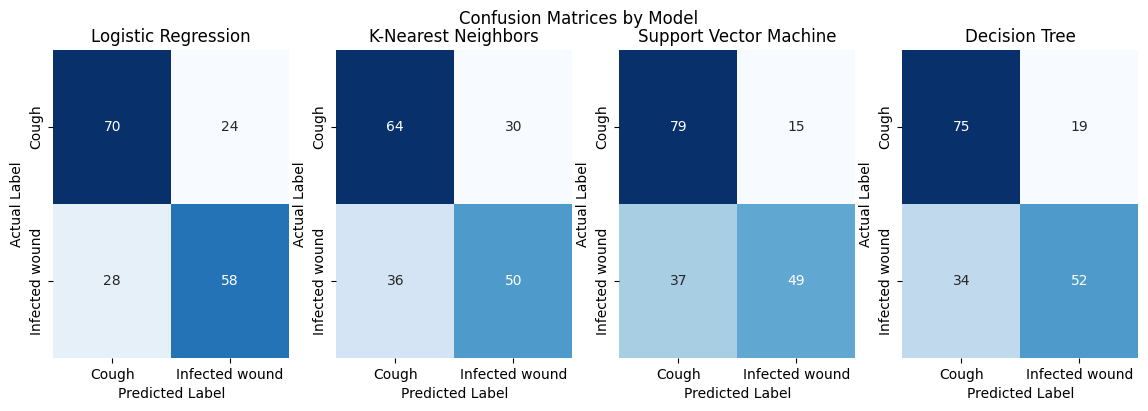

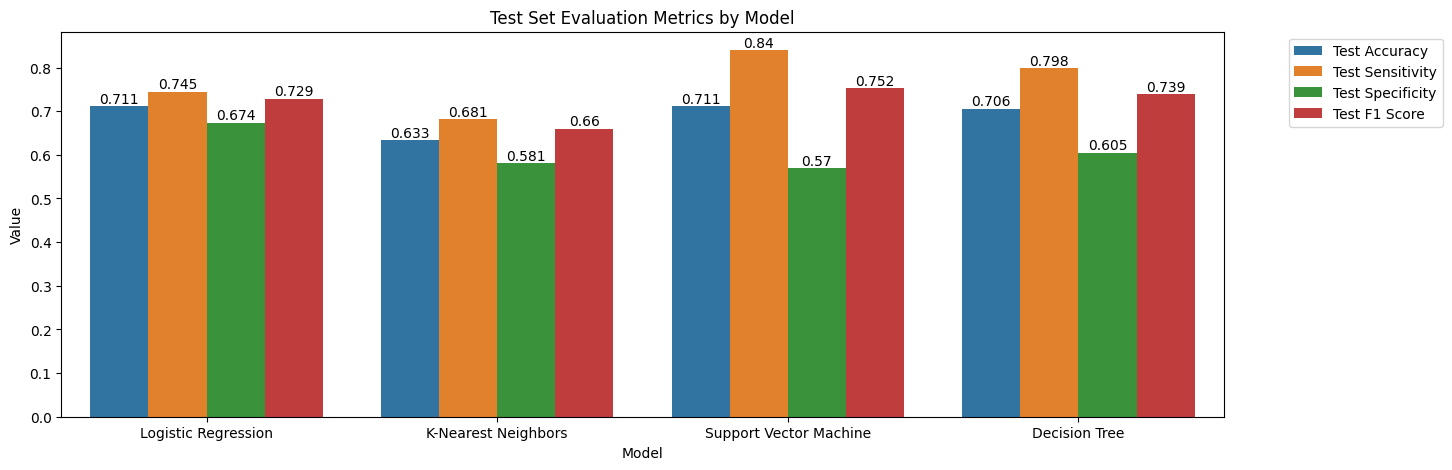

In [141]:
models_analysis_a.results(show_df=True)

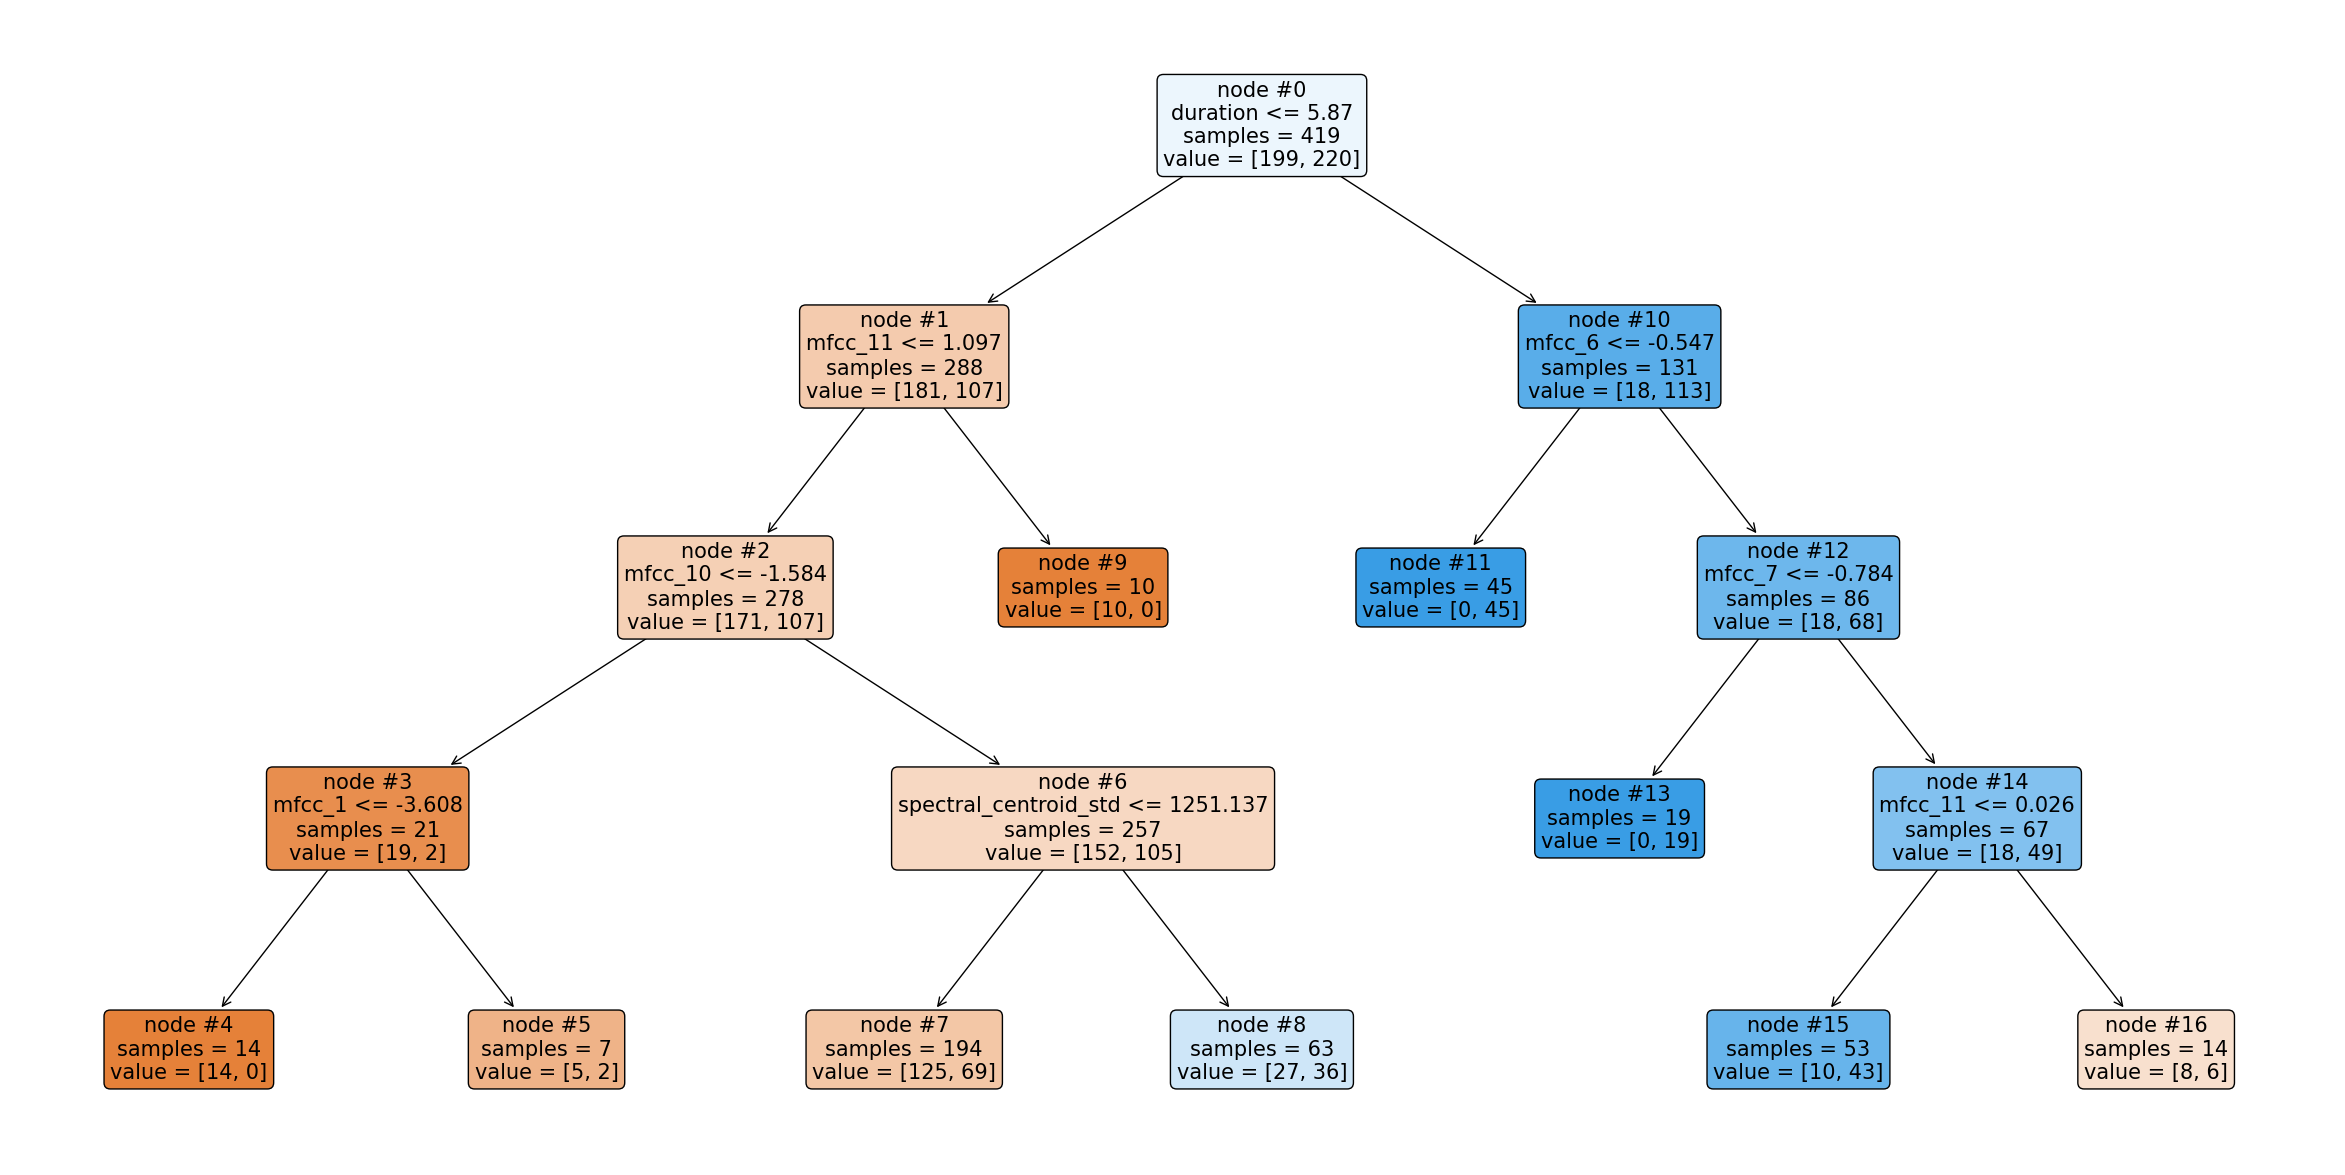

In [142]:
models_analysis_a.plot_tree()

## **Full Data with clustering**

In [162]:
models_analysis_b = modelingClass(X_b,y_b)
models_analysis_b.split_scale_data()
models_analysis_b.train_models()
models_analysis_b.test_models()

Splitting and scaling the data
-----------------------------------
Training Phase:
Training 'Logistic Regression' model
Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training 'K-Nearest Neighbors' model
Fitting 5 folds for each of 89 candidates, totalling 445 fits
Training 'Support Vector Machine' model
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Training 'Decision Tree' model
Fitting 5 folds for each of 24 candidates, totalling 120 fits
The training of the models is done.
-----------------------------------
Testing Phase:
Testing 'Logistic Regression' model
Testing 'K-Nearest Neighbors' model
Testing 'Support Vector Machine' model
Testing 'Decision Tree' model
The testing of the models is done.
-----------------------------------


,Model,Best Parameters,Train Accuracy,Test Accuracy,Test Sensitivity,Test Specificity,Test F1 Score
0,Logistic Regression,"{'C': 0.4493289641172217, 'penalty': 'l1'}",0.706,0.711,0.745,0.674,0.729
1,K-Nearest Neighbors,{'n_neighbors': 57},0.663,0.644,0.649,0.640,0.656
2,Support Vector Machine,"{'C': 0.36787944117144233, 'degree': 3, 'gamma...",0.702,0.706,0.745,0.663,0.725
3,Decision Tree,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.728,0.706,0.798,0.605,0.739


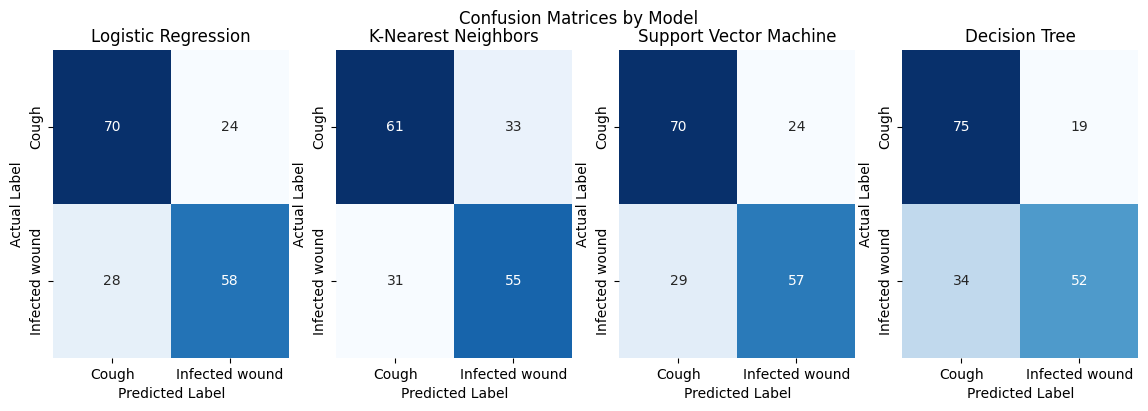

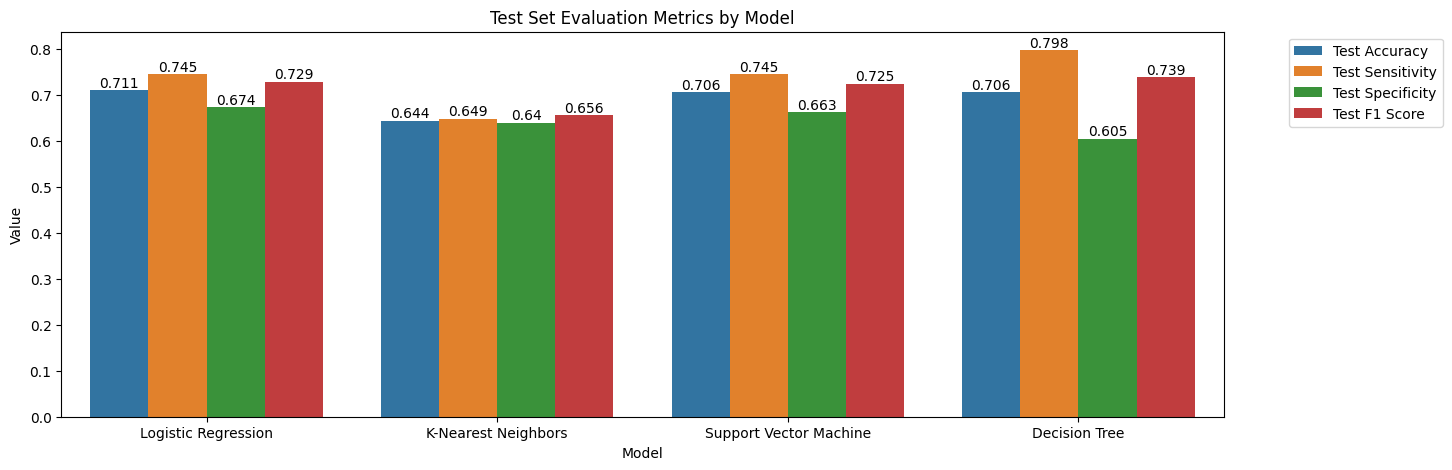

In [145]:
models_analysis_b.results(show_df=True)

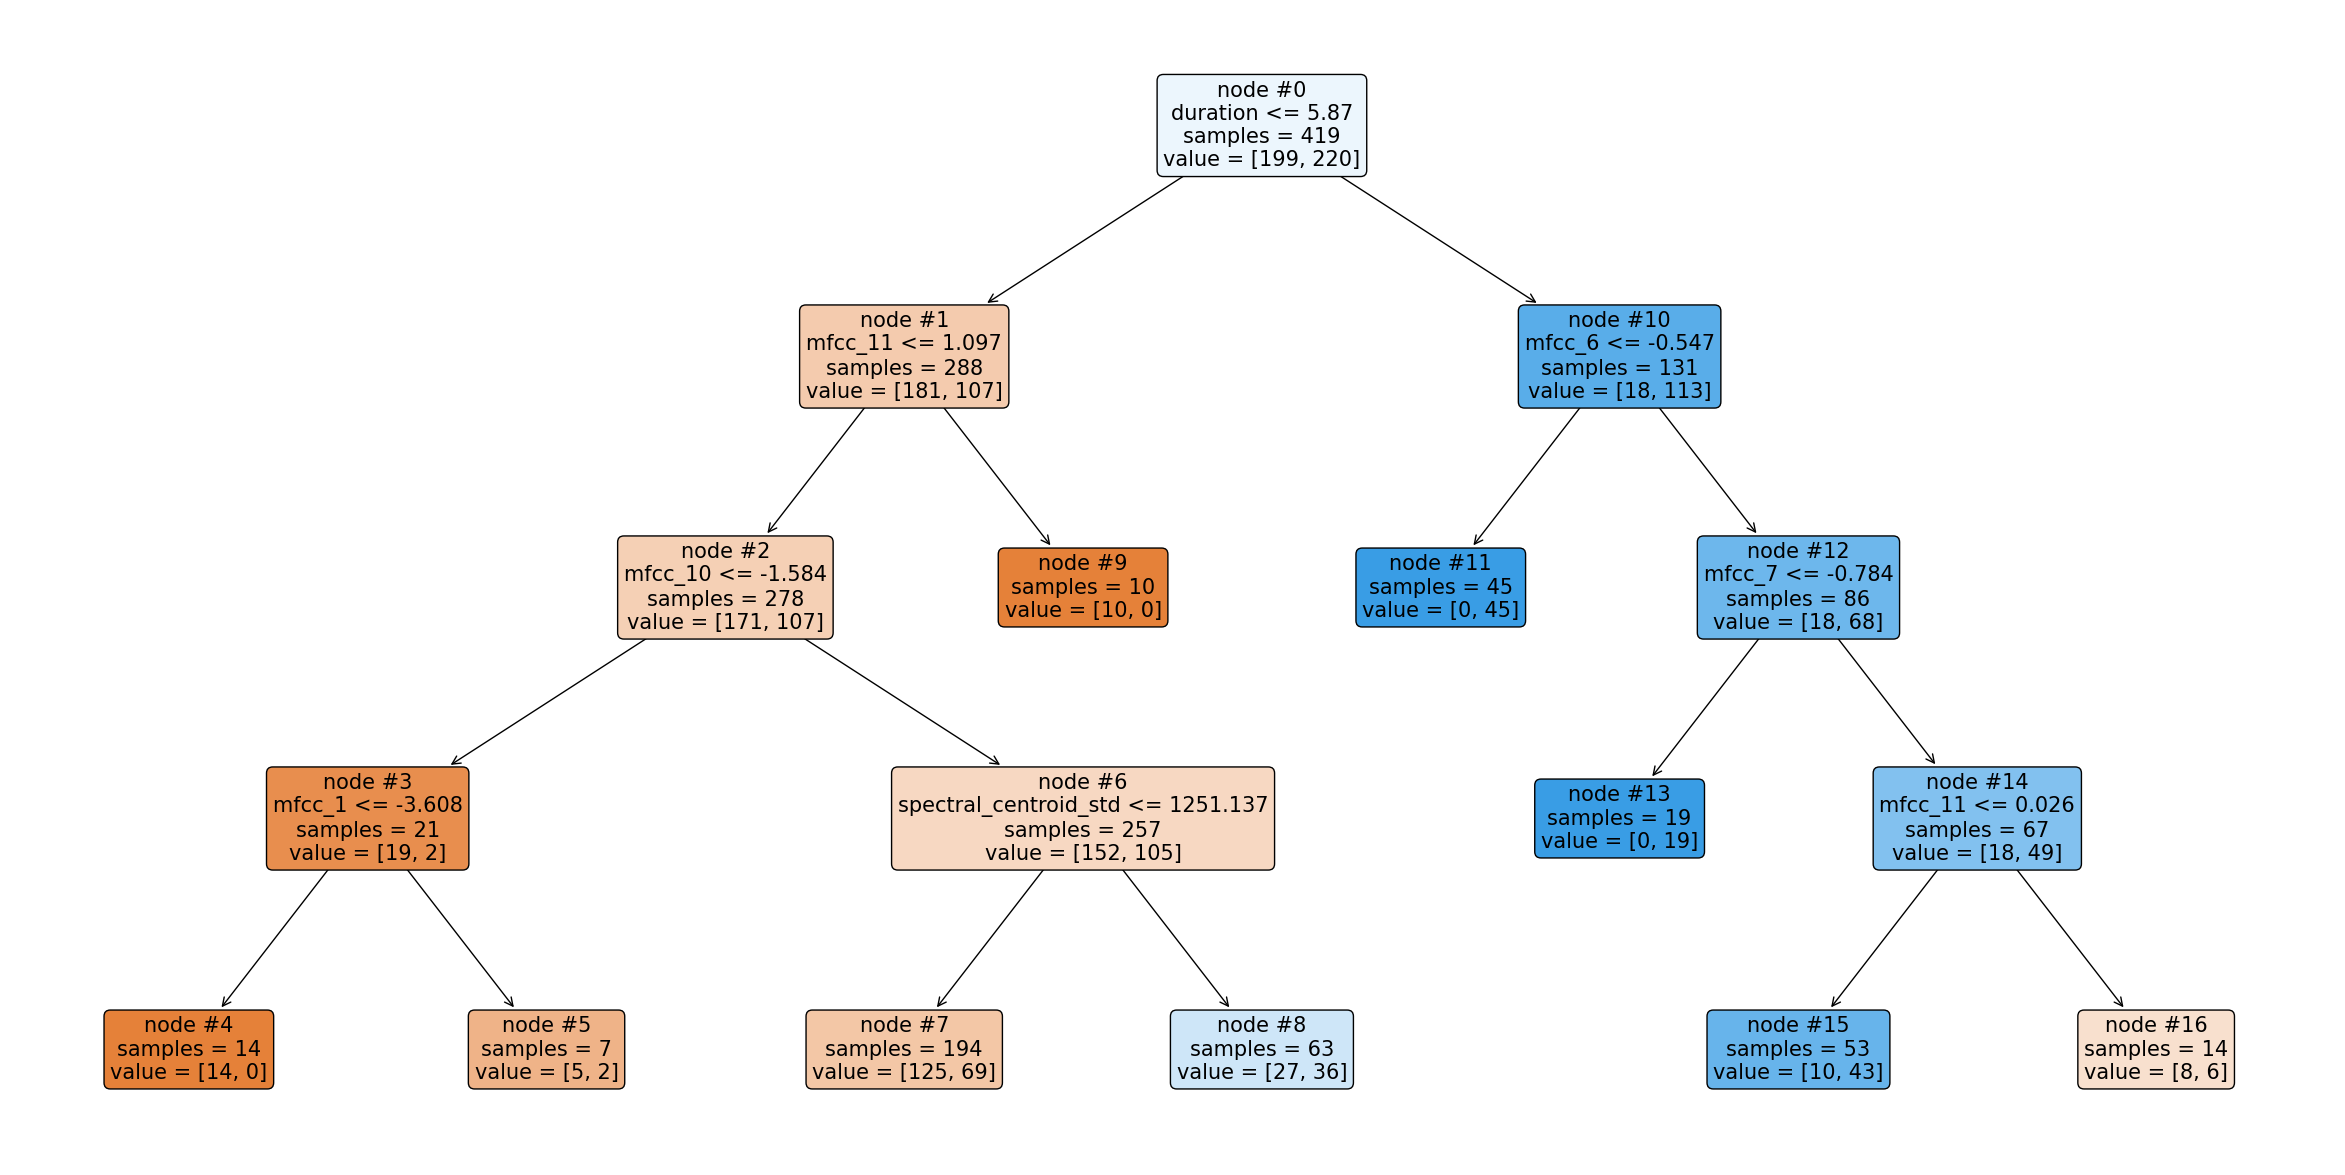

In [146]:
models_analysis_b.plot_tree()

## **different models for each cluster**

In [157]:
X_c_0 = X_b[X_b['clusters_gmm']==0]
y_c_0 = y_b[X_b['clusters_gmm']==0]
X_c_1 = X_b[X_b['clusters_gmm']==1]
y_c_1 = y_b[X_b['clusters_gmm']==1]

In [170]:
models_analysis_c_0 = modelingClass(X_c_0,y_c_0)
models_analysis_c_0.split_scale_data()
models_analysis_c_0.train_models()
models_analysis_c_0.test_models()

Splitting and scaling the data
-----------------------------------
Training Phase:
Training 'Logistic Regression' model
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Training 'K-Nearest Neighbors' model
Fitting 5 folds for each of 61 candidates, totalling 305 fits
Training 'Support Vector Machine' model
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Training 'Decision Tree' model
Fitting 5 folds for each of 24 candidates, totalling 120 fits
The training of the models is done.
-----------------------------------
Testing Phase:
Testing 'Logistic Regression' model
Testing 'K-Nearest Neighbors' model
Testing 'Support Vector Machine' model
Testing 'Decision Tree' model
The testing of the models is done.
-----------------------------------


,Model,Best Parameters,Train Accuracy,Test Accuracy,Test Sensitivity,Test Specificity,Test F1 Score
0,Logistic Regression,"{'C': 0.36787944117144233, 'penalty': 'l1'}",0.714,0.656,0.792,0.571,0.639
1,K-Nearest Neighbors,{'n_neighbors': 41},0.652,0.616,0.938,0.416,0.652
2,Support Vector Machine,"{'C': 0.49658530379140947, 'degree': 3, 'gamma...",0.738,0.648,0.938,0.468,0.672
3,Decision Tree,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.731,0.688,0.938,0.532,0.698


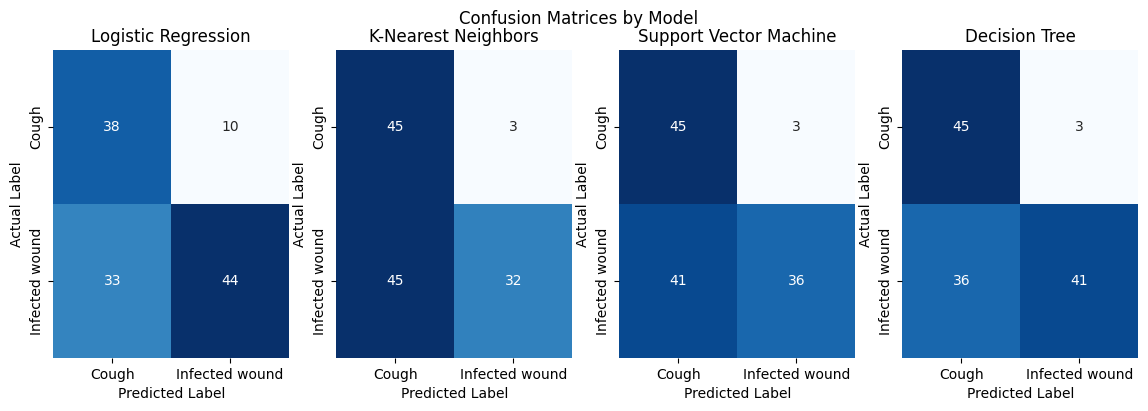

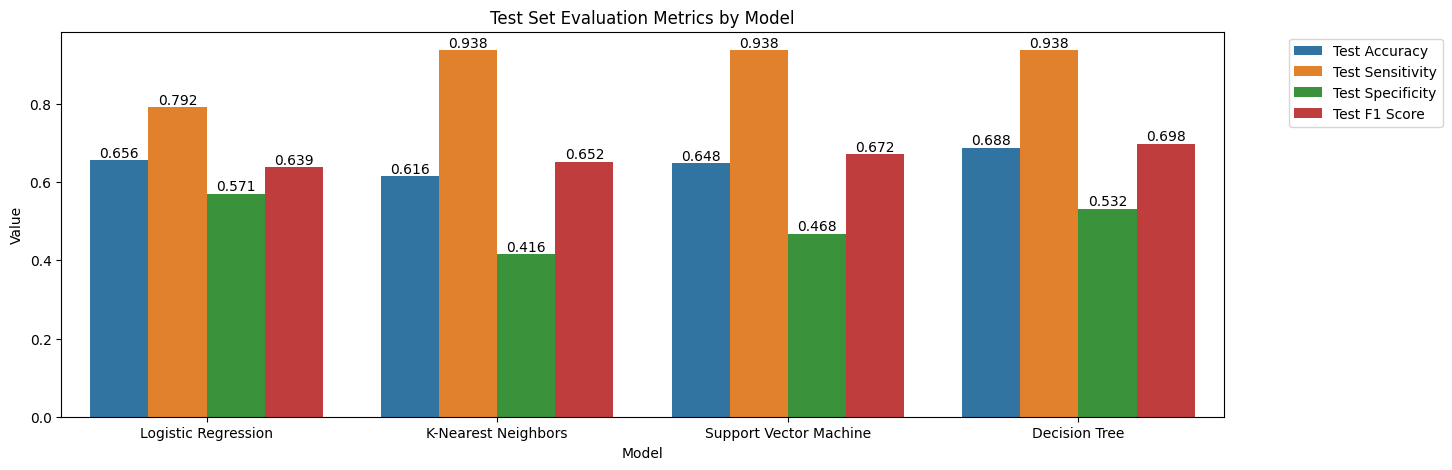

In [171]:
models_analysis_c_0.results(show_df=True)

In [160]:
models_analysis_c_1 = modelingClass(X_c_1,y_c_1)
models_analysis_c_1.split_scale_data()
models_analysis_c_1.train_models()
models_analysis_c_1.test_models()

Splitting and scaling the data
-----------------------------------
Training Phase:
Training 'Logistic Regression' model
Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training 'K-Nearest Neighbors' model
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Training 'Support Vector Machine' model
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Training 'Decision Tree' model
Fitting 5 folds for each of 24 candidates, totalling 120 fits
The training of the models is done.
-----------------------------------
Testing Phase:
Testing 'Logistic Regression' model
Testing 'K-Nearest Neighbors' model
Testing 'Support Vector Machine' model
Testing 'Decision Tree' model
The testing of the models is done.
-----------------------------------


,Model,Best Parameters,Train Accuracy,Test Accuracy,Test Sensitivity,Test Specificity,Test F1 Score
0,Logistic Regression,"{'C': 0.5769498103804869, 'penalty': 'l1'}",0.766,0.732,0.72,0.742,0.706
1,K-Nearest Neighbors,{'n_neighbors': 55},0.641,0.607,0.84,0.419,0.656
2,Support Vector Machine,"{'C': 0.36787944117144233, 'degree': 3, 'gamma...",0.781,0.768,0.76,0.774,0.745
3,Decision Tree,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.773,0.750,0.88,0.645,0.759


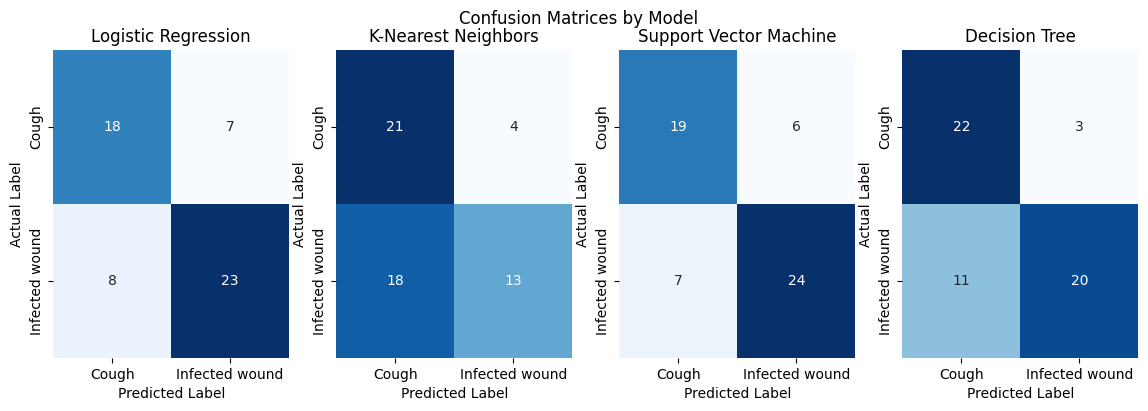

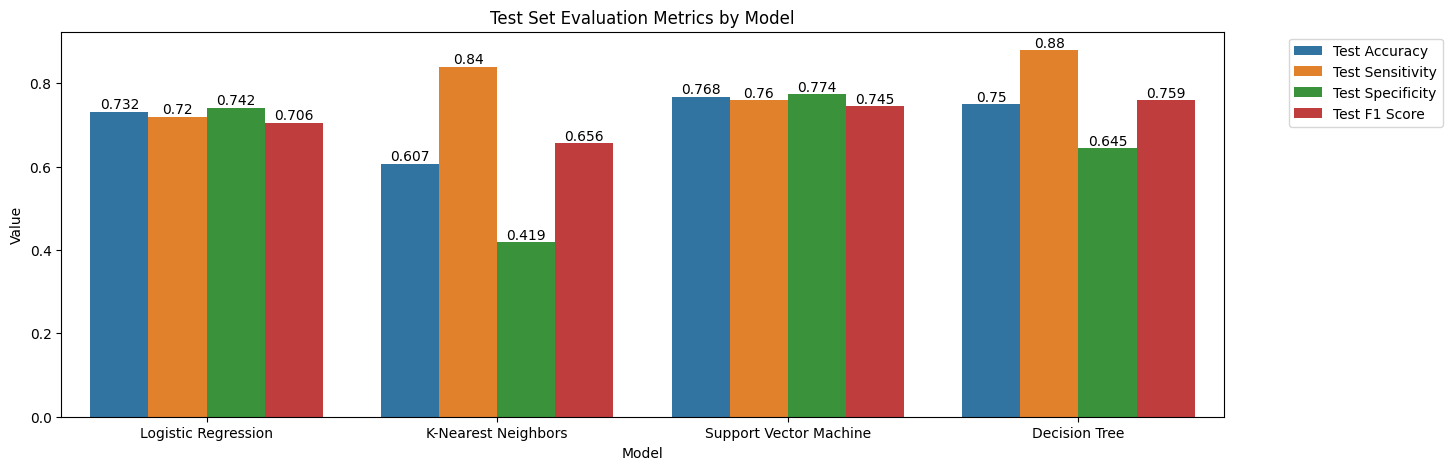

In [161]:
models_analysis_c_1.results(show_df=True)

# **Phrases Natural Language Analysis**

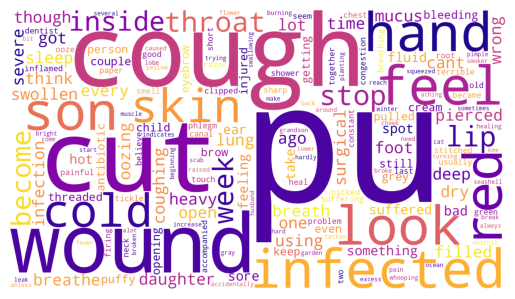

In [106]:
NLP = EDAClass(filepath = meta_data_path, audio_dir = audio_dir, binary_outcome=True)
NLP.NLP()
NLP.NLP(show_wordcloud=False,drop_leading_words=True,inplace=True)
X, y = NLP.X, NLP.y

In [107]:
NLP_models_analysis = modelingClass(X,y,NLP=True)
NLP_models_analysis.split_scale_data()
NLP_models_analysis.train_models()

Splitting and scaling the data
-----------------------------------
Training Phase:
Training 'Logistic Regression' model
Fitting 5 folds for each of 40 candidates, totalling 200 fits
The training of the models is done.
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [108]:
NLP_models_analysis.test_models()

Testing Phase:
Testing 'Logistic Regression' model
The testing of the models is done.
-----------------------------------


,Model,Best Parameters,Train Accuracy,Test Accuracy,Test Sensitivity,Test Specificity,Test F1 Score
0,Logistic Regression,"{'C': 0.36787944117144233, 'penalty': 'l1'}",1.0,1.0,1.0,1.0,1.0


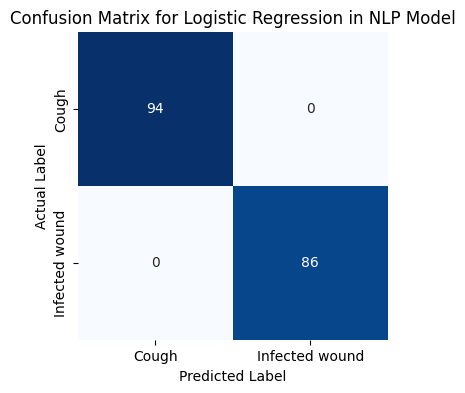

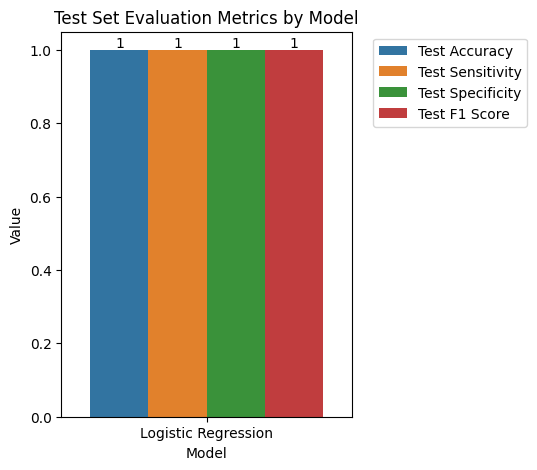

In [109]:
NLP_models_analysis.results(show_df=True)